In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision import transforms
import torch
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage
from models import *

In [2]:
class rellis_dataset(Dataset):
    """
    Using 6 classes
    """
    def __init__(self, data_root_dir, txt_file, transform=None, target_transform=None):
        """
        data_root_dit: root directory of the dataset, e.g. './data/rellis'
        txt_file: path to the train.txt listing image files
        
        """
        self.data_root_dir = data_root_dir
        self.transform = transform
        self.target_transform = target_transform
        with open(txt_file, 'r') as f:
            self.image_paths = [line.strip() for line in f.readlines()]
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.data_root_dir, 'image', self.image_paths[index] + '.jpg')
        ann_path = os.path.join(self.data_root_dir, 'annotation', self.image_paths[index] + '_group6.png')
        image = Image.open(img_path).convert('RGB')
        annotation = Image.open(ann_path)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            annotation = self.target_transform(annotation)
        annotation = (annotation*256).long() # turn the label to the interger
        return image, annotation

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = make_SegFormerB5(6)  # Instantiate your model
model.load_state_dict(torch.load('model_b5_result/best_segmentation_model_24.pth', map_location=device))
model.to('cuda')
model.eval()


RuntimeError: Error(s) in loading state_dict for Segformer:
	Missing key(s) in state_dict: "mit.stages.0.2.2.0.fn.to_q.weight", "mit.stages.0.2.2.0.fn.to_kv.weight", "mit.stages.0.2.2.0.fn.to_out.weight", "mit.stages.0.2.2.0.norm.g", "mit.stages.0.2.2.0.norm.b", "mit.stages.0.2.2.1.fn.net.0.weight", "mit.stages.0.2.2.1.fn.net.0.bias", "mit.stages.0.2.2.1.fn.net.1.net.0.weight", "mit.stages.0.2.2.1.fn.net.1.net.0.bias", "mit.stages.0.2.2.1.fn.net.1.net.1.weight", "mit.stages.0.2.2.1.fn.net.1.net.1.bias", "mit.stages.0.2.2.1.fn.net.3.weight", "mit.stages.0.2.2.1.fn.net.3.bias", "mit.stages.0.2.2.1.norm.g", "mit.stages.0.2.2.1.norm.b", "mit.stages.1.2.2.0.fn.to_q.weight", "mit.stages.1.2.2.0.fn.to_kv.weight", "mit.stages.1.2.2.0.fn.to_out.weight", "mit.stages.1.2.2.0.norm.g", "mit.stages.1.2.2.0.norm.b", "mit.stages.1.2.2.1.fn.net.0.weight", "mit.stages.1.2.2.1.fn.net.0.bias", "mit.stages.1.2.2.1.fn.net.1.net.0.weight", "mit.stages.1.2.2.1.fn.net.1.net.0.bias", "mit.stages.1.2.2.1.fn.net.1.net.1.weight", "mit.stages.1.2.2.1.fn.net.1.net.1.bias", "mit.stages.1.2.2.1.fn.net.3.weight", "mit.stages.1.2.2.1.fn.net.3.bias", "mit.stages.1.2.2.1.norm.g", "mit.stages.1.2.2.1.norm.b", "mit.stages.1.2.3.0.fn.to_q.weight", "mit.stages.1.2.3.0.fn.to_kv.weight", "mit.stages.1.2.3.0.fn.to_out.weight", "mit.stages.1.2.3.0.norm.g", "mit.stages.1.2.3.0.norm.b", "mit.stages.1.2.3.1.fn.net.0.weight", "mit.stages.1.2.3.1.fn.net.0.bias", "mit.stages.1.2.3.1.fn.net.1.net.0.weight", "mit.stages.1.2.3.1.fn.net.1.net.0.bias", "mit.stages.1.2.3.1.fn.net.1.net.1.weight", "mit.stages.1.2.3.1.fn.net.1.net.1.bias", "mit.stages.1.2.3.1.fn.net.3.weight", "mit.stages.1.2.3.1.fn.net.3.bias", "mit.stages.1.2.3.1.norm.g", "mit.stages.1.2.3.1.norm.b", "mit.stages.1.2.4.0.fn.to_q.weight", "mit.stages.1.2.4.0.fn.to_kv.weight", "mit.stages.1.2.4.0.fn.to_out.weight", "mit.stages.1.2.4.0.norm.g", "mit.stages.1.2.4.0.norm.b", "mit.stages.1.2.4.1.fn.net.0.weight", "mit.stages.1.2.4.1.fn.net.0.bias", "mit.stages.1.2.4.1.fn.net.1.net.0.weight", "mit.stages.1.2.4.1.fn.net.1.net.0.bias", "mit.stages.1.2.4.1.fn.net.1.net.1.weight", "mit.stages.1.2.4.1.fn.net.1.net.1.bias", "mit.stages.1.2.4.1.fn.net.3.weight", "mit.stages.1.2.4.1.fn.net.3.bias", "mit.stages.1.2.4.1.norm.g", "mit.stages.1.2.4.1.norm.b", "mit.stages.1.2.5.0.fn.to_q.weight", "mit.stages.1.2.5.0.fn.to_kv.weight", "mit.stages.1.2.5.0.fn.to_out.weight", "mit.stages.1.2.5.0.norm.g", "mit.stages.1.2.5.0.norm.b", "mit.stages.1.2.5.1.fn.net.0.weight", "mit.stages.1.2.5.1.fn.net.0.bias", "mit.stages.1.2.5.1.fn.net.1.net.0.weight", "mit.stages.1.2.5.1.fn.net.1.net.0.bias", "mit.stages.1.2.5.1.fn.net.1.net.1.weight", "mit.stages.1.2.5.1.fn.net.1.net.1.bias", "mit.stages.1.2.5.1.fn.net.3.weight", "mit.stages.1.2.5.1.fn.net.3.bias", "mit.stages.1.2.5.1.norm.g", "mit.stages.1.2.5.1.norm.b", "mit.stages.2.2.2.0.fn.to_q.weight", "mit.stages.2.2.2.0.fn.to_kv.weight", "mit.stages.2.2.2.0.fn.to_out.weight", "mit.stages.2.2.2.0.norm.g", "mit.stages.2.2.2.0.norm.b", "mit.stages.2.2.2.1.fn.net.0.weight", "mit.stages.2.2.2.1.fn.net.0.bias", "mit.stages.2.2.2.1.fn.net.1.net.0.weight", "mit.stages.2.2.2.1.fn.net.1.net.0.bias", "mit.stages.2.2.2.1.fn.net.1.net.1.weight", "mit.stages.2.2.2.1.fn.net.1.net.1.bias", "mit.stages.2.2.2.1.fn.net.3.weight", "mit.stages.2.2.2.1.fn.net.3.bias", "mit.stages.2.2.2.1.norm.g", "mit.stages.2.2.2.1.norm.b", "mit.stages.2.2.3.0.fn.to_q.weight", "mit.stages.2.2.3.0.fn.to_kv.weight", "mit.stages.2.2.3.0.fn.to_out.weight", "mit.stages.2.2.3.0.norm.g", "mit.stages.2.2.3.0.norm.b", "mit.stages.2.2.3.1.fn.net.0.weight", "mit.stages.2.2.3.1.fn.net.0.bias", "mit.stages.2.2.3.1.fn.net.1.net.0.weight", "mit.stages.2.2.3.1.fn.net.1.net.0.bias", "mit.stages.2.2.3.1.fn.net.1.net.1.weight", "mit.stages.2.2.3.1.fn.net.1.net.1.bias", "mit.stages.2.2.3.1.fn.net.3.weight", "mit.stages.2.2.3.1.fn.net.3.bias", "mit.stages.2.2.3.1.norm.g", "mit.stages.2.2.3.1.norm.b", "mit.stages.2.2.4.0.fn.to_q.weight", "mit.stages.2.2.4.0.fn.to_kv.weight", "mit.stages.2.2.4.0.fn.to_out.weight", "mit.stages.2.2.4.0.norm.g", "mit.stages.2.2.4.0.norm.b", "mit.stages.2.2.4.1.fn.net.0.weight", "mit.stages.2.2.4.1.fn.net.0.bias", "mit.stages.2.2.4.1.fn.net.1.net.0.weight", "mit.stages.2.2.4.1.fn.net.1.net.0.bias", "mit.stages.2.2.4.1.fn.net.1.net.1.weight", "mit.stages.2.2.4.1.fn.net.1.net.1.bias", "mit.stages.2.2.4.1.fn.net.3.weight", "mit.stages.2.2.4.1.fn.net.3.bias", "mit.stages.2.2.4.1.norm.g", "mit.stages.2.2.4.1.norm.b", "mit.stages.2.2.5.0.fn.to_q.weight", "mit.stages.2.2.5.0.fn.to_kv.weight", "mit.stages.2.2.5.0.fn.to_out.weight", "mit.stages.2.2.5.0.norm.g", "mit.stages.2.2.5.0.norm.b", "mit.stages.2.2.5.1.fn.net.0.weight", "mit.stages.2.2.5.1.fn.net.0.bias", "mit.stages.2.2.5.1.fn.net.1.net.0.weight", "mit.stages.2.2.5.1.fn.net.1.net.0.bias", "mit.stages.2.2.5.1.fn.net.1.net.1.weight", "mit.stages.2.2.5.1.fn.net.1.net.1.bias", "mit.stages.2.2.5.1.fn.net.3.weight", "mit.stages.2.2.5.1.fn.net.3.bias", "mit.stages.2.2.5.1.norm.g", "mit.stages.2.2.5.1.norm.b", "mit.stages.2.2.6.0.fn.to_q.weight", "mit.stages.2.2.6.0.fn.to_kv.weight", "mit.stages.2.2.6.0.fn.to_out.weight", "mit.stages.2.2.6.0.norm.g", "mit.stages.2.2.6.0.norm.b", "mit.stages.2.2.6.1.fn.net.0.weight", "mit.stages.2.2.6.1.fn.net.0.bias", "mit.stages.2.2.6.1.fn.net.1.net.0.weight", "mit.stages.2.2.6.1.fn.net.1.net.0.bias", "mit.stages.2.2.6.1.fn.net.1.net.1.weight", "mit.stages.2.2.6.1.fn.net.1.net.1.bias", "mit.stages.2.2.6.1.fn.net.3.weight", "mit.stages.2.2.6.1.fn.net.3.bias", "mit.stages.2.2.6.1.norm.g", "mit.stages.2.2.6.1.norm.b", "mit.stages.2.2.7.0.fn.to_q.weight", "mit.stages.2.2.7.0.fn.to_kv.weight", "mit.stages.2.2.7.0.fn.to_out.weight", "mit.stages.2.2.7.0.norm.g", "mit.stages.2.2.7.0.norm.b", "mit.stages.2.2.7.1.fn.net.0.weight", "mit.stages.2.2.7.1.fn.net.0.bias", "mit.stages.2.2.7.1.fn.net.1.net.0.weight", "mit.stages.2.2.7.1.fn.net.1.net.0.bias", "mit.stages.2.2.7.1.fn.net.1.net.1.weight", "mit.stages.2.2.7.1.fn.net.1.net.1.bias", "mit.stages.2.2.7.1.fn.net.3.weight", "mit.stages.2.2.7.1.fn.net.3.bias", "mit.stages.2.2.7.1.norm.g", "mit.stages.2.2.7.1.norm.b", "mit.stages.2.2.8.0.fn.to_q.weight", "mit.stages.2.2.8.0.fn.to_kv.weight", "mit.stages.2.2.8.0.fn.to_out.weight", "mit.stages.2.2.8.0.norm.g", "mit.stages.2.2.8.0.norm.b", "mit.stages.2.2.8.1.fn.net.0.weight", "mit.stages.2.2.8.1.fn.net.0.bias", "mit.stages.2.2.8.1.fn.net.1.net.0.weight", "mit.stages.2.2.8.1.fn.net.1.net.0.bias", "mit.stages.2.2.8.1.fn.net.1.net.1.weight", "mit.stages.2.2.8.1.fn.net.1.net.1.bias", "mit.stages.2.2.8.1.fn.net.3.weight", "mit.stages.2.2.8.1.fn.net.3.bias", "mit.stages.2.2.8.1.norm.g", "mit.stages.2.2.8.1.norm.b", "mit.stages.2.2.9.0.fn.to_q.weight", "mit.stages.2.2.9.0.fn.to_kv.weight", "mit.stages.2.2.9.0.fn.to_out.weight", "mit.stages.2.2.9.0.norm.g", "mit.stages.2.2.9.0.norm.b", "mit.stages.2.2.9.1.fn.net.0.weight", "mit.stages.2.2.9.1.fn.net.0.bias", "mit.stages.2.2.9.1.fn.net.1.net.0.weight", "mit.stages.2.2.9.1.fn.net.1.net.0.bias", "mit.stages.2.2.9.1.fn.net.1.net.1.weight", "mit.stages.2.2.9.1.fn.net.1.net.1.bias", "mit.stages.2.2.9.1.fn.net.3.weight", "mit.stages.2.2.9.1.fn.net.3.bias", "mit.stages.2.2.9.1.norm.g", "mit.stages.2.2.9.1.norm.b", "mit.stages.2.2.10.0.fn.to_q.weight", "mit.stages.2.2.10.0.fn.to_kv.weight", "mit.stages.2.2.10.0.fn.to_out.weight", "mit.stages.2.2.10.0.norm.g", "mit.stages.2.2.10.0.norm.b", "mit.stages.2.2.10.1.fn.net.0.weight", "mit.stages.2.2.10.1.fn.net.0.bias", "mit.stages.2.2.10.1.fn.net.1.net.0.weight", "mit.stages.2.2.10.1.fn.net.1.net.0.bias", "mit.stages.2.2.10.1.fn.net.1.net.1.weight", "mit.stages.2.2.10.1.fn.net.1.net.1.bias", "mit.stages.2.2.10.1.fn.net.3.weight", "mit.stages.2.2.10.1.fn.net.3.bias", "mit.stages.2.2.10.1.norm.g", "mit.stages.2.2.10.1.norm.b", "mit.stages.2.2.11.0.fn.to_q.weight", "mit.stages.2.2.11.0.fn.to_kv.weight", "mit.stages.2.2.11.0.fn.to_out.weight", "mit.stages.2.2.11.0.norm.g", "mit.stages.2.2.11.0.norm.b", "mit.stages.2.2.11.1.fn.net.0.weight", "mit.stages.2.2.11.1.fn.net.0.bias", "mit.stages.2.2.11.1.fn.net.1.net.0.weight", "mit.stages.2.2.11.1.fn.net.1.net.0.bias", "mit.stages.2.2.11.1.fn.net.1.net.1.weight", "mit.stages.2.2.11.1.fn.net.1.net.1.bias", "mit.stages.2.2.11.1.fn.net.3.weight", "mit.stages.2.2.11.1.fn.net.3.bias", "mit.stages.2.2.11.1.norm.g", "mit.stages.2.2.11.1.norm.b", "mit.stages.2.2.12.0.fn.to_q.weight", "mit.stages.2.2.12.0.fn.to_kv.weight", "mit.stages.2.2.12.0.fn.to_out.weight", "mit.stages.2.2.12.0.norm.g", "mit.stages.2.2.12.0.norm.b", "mit.stages.2.2.12.1.fn.net.0.weight", "mit.stages.2.2.12.1.fn.net.0.bias", "mit.stages.2.2.12.1.fn.net.1.net.0.weight", "mit.stages.2.2.12.1.fn.net.1.net.0.bias", "mit.stages.2.2.12.1.fn.net.1.net.1.weight", "mit.stages.2.2.12.1.fn.net.1.net.1.bias", "mit.stages.2.2.12.1.fn.net.3.weight", "mit.stages.2.2.12.1.fn.net.3.bias", "mit.stages.2.2.12.1.norm.g", "mit.stages.2.2.12.1.norm.b", "mit.stages.2.2.13.0.fn.to_q.weight", "mit.stages.2.2.13.0.fn.to_kv.weight", "mit.stages.2.2.13.0.fn.to_out.weight", "mit.stages.2.2.13.0.norm.g", "mit.stages.2.2.13.0.norm.b", "mit.stages.2.2.13.1.fn.net.0.weight", "mit.stages.2.2.13.1.fn.net.0.bias", "mit.stages.2.2.13.1.fn.net.1.net.0.weight", "mit.stages.2.2.13.1.fn.net.1.net.0.bias", "mit.stages.2.2.13.1.fn.net.1.net.1.weight", "mit.stages.2.2.13.1.fn.net.1.net.1.bias", "mit.stages.2.2.13.1.fn.net.3.weight", "mit.stages.2.2.13.1.fn.net.3.bias", "mit.stages.2.2.13.1.norm.g", "mit.stages.2.2.13.1.norm.b", "mit.stages.2.2.14.0.fn.to_q.weight", "mit.stages.2.2.14.0.fn.to_kv.weight", "mit.stages.2.2.14.0.fn.to_out.weight", "mit.stages.2.2.14.0.norm.g", "mit.stages.2.2.14.0.norm.b", "mit.stages.2.2.14.1.fn.net.0.weight", "mit.stages.2.2.14.1.fn.net.0.bias", "mit.stages.2.2.14.1.fn.net.1.net.0.weight", "mit.stages.2.2.14.1.fn.net.1.net.0.bias", "mit.stages.2.2.14.1.fn.net.1.net.1.weight", "mit.stages.2.2.14.1.fn.net.1.net.1.bias", "mit.stages.2.2.14.1.fn.net.3.weight", "mit.stages.2.2.14.1.fn.net.3.bias", "mit.stages.2.2.14.1.norm.g", "mit.stages.2.2.14.1.norm.b", "mit.stages.2.2.15.0.fn.to_q.weight", "mit.stages.2.2.15.0.fn.to_kv.weight", "mit.stages.2.2.15.0.fn.to_out.weight", "mit.stages.2.2.15.0.norm.g", "mit.stages.2.2.15.0.norm.b", "mit.stages.2.2.15.1.fn.net.0.weight", "mit.stages.2.2.15.1.fn.net.0.bias", "mit.stages.2.2.15.1.fn.net.1.net.0.weight", "mit.stages.2.2.15.1.fn.net.1.net.0.bias", "mit.stages.2.2.15.1.fn.net.1.net.1.weight", "mit.stages.2.2.15.1.fn.net.1.net.1.bias", "mit.stages.2.2.15.1.fn.net.3.weight", "mit.stages.2.2.15.1.fn.net.3.bias", "mit.stages.2.2.15.1.norm.g", "mit.stages.2.2.15.1.norm.b", "mit.stages.2.2.16.0.fn.to_q.weight", "mit.stages.2.2.16.0.fn.to_kv.weight", "mit.stages.2.2.16.0.fn.to_out.weight", "mit.stages.2.2.16.0.norm.g", "mit.stages.2.2.16.0.norm.b", "mit.stages.2.2.16.1.fn.net.0.weight", "mit.stages.2.2.16.1.fn.net.0.bias", "mit.stages.2.2.16.1.fn.net.1.net.0.weight", "mit.stages.2.2.16.1.fn.net.1.net.0.bias", "mit.stages.2.2.16.1.fn.net.1.net.1.weight", "mit.stages.2.2.16.1.fn.net.1.net.1.bias", "mit.stages.2.2.16.1.fn.net.3.weight", "mit.stages.2.2.16.1.fn.net.3.bias", "mit.stages.2.2.16.1.norm.g", "mit.stages.2.2.16.1.norm.b", "mit.stages.2.2.17.0.fn.to_q.weight", "mit.stages.2.2.17.0.fn.to_kv.weight", "mit.stages.2.2.17.0.fn.to_out.weight", "mit.stages.2.2.17.0.norm.g", "mit.stages.2.2.17.0.norm.b", "mit.stages.2.2.17.1.fn.net.0.weight", "mit.stages.2.2.17.1.fn.net.0.bias", "mit.stages.2.2.17.1.fn.net.1.net.0.weight", "mit.stages.2.2.17.1.fn.net.1.net.0.bias", "mit.stages.2.2.17.1.fn.net.1.net.1.weight", "mit.stages.2.2.17.1.fn.net.1.net.1.bias", "mit.stages.2.2.17.1.fn.net.3.weight", "mit.stages.2.2.17.1.fn.net.3.bias", "mit.stages.2.2.17.1.norm.g", "mit.stages.2.2.17.1.norm.b", "mit.stages.2.2.18.0.fn.to_q.weight", "mit.stages.2.2.18.0.fn.to_kv.weight", "mit.stages.2.2.18.0.fn.to_out.weight", "mit.stages.2.2.18.0.norm.g", "mit.stages.2.2.18.0.norm.b", "mit.stages.2.2.18.1.fn.net.0.weight", "mit.stages.2.2.18.1.fn.net.0.bias", "mit.stages.2.2.18.1.fn.net.1.net.0.weight", "mit.stages.2.2.18.1.fn.net.1.net.0.bias", "mit.stages.2.2.18.1.fn.net.1.net.1.weight", "mit.stages.2.2.18.1.fn.net.1.net.1.bias", "mit.stages.2.2.18.1.fn.net.3.weight", "mit.stages.2.2.18.1.fn.net.3.bias", "mit.stages.2.2.18.1.norm.g", "mit.stages.2.2.18.1.norm.b", "mit.stages.2.2.19.0.fn.to_q.weight", "mit.stages.2.2.19.0.fn.to_kv.weight", "mit.stages.2.2.19.0.fn.to_out.weight", "mit.stages.2.2.19.0.norm.g", "mit.stages.2.2.19.0.norm.b", "mit.stages.2.2.19.1.fn.net.0.weight", "mit.stages.2.2.19.1.fn.net.0.bias", "mit.stages.2.2.19.1.fn.net.1.net.0.weight", "mit.stages.2.2.19.1.fn.net.1.net.0.bias", "mit.stages.2.2.19.1.fn.net.1.net.1.weight", "mit.stages.2.2.19.1.fn.net.1.net.1.bias", "mit.stages.2.2.19.1.fn.net.3.weight", "mit.stages.2.2.19.1.fn.net.3.bias", "mit.stages.2.2.19.1.norm.g", "mit.stages.2.2.19.1.norm.b", "mit.stages.2.2.20.0.fn.to_q.weight", "mit.stages.2.2.20.0.fn.to_kv.weight", "mit.stages.2.2.20.0.fn.to_out.weight", "mit.stages.2.2.20.0.norm.g", "mit.stages.2.2.20.0.norm.b", "mit.stages.2.2.20.1.fn.net.0.weight", "mit.stages.2.2.20.1.fn.net.0.bias", "mit.stages.2.2.20.1.fn.net.1.net.0.weight", "mit.stages.2.2.20.1.fn.net.1.net.0.bias", "mit.stages.2.2.20.1.fn.net.1.net.1.weight", "mit.stages.2.2.20.1.fn.net.1.net.1.bias", "mit.stages.2.2.20.1.fn.net.3.weight", "mit.stages.2.2.20.1.fn.net.3.bias", "mit.stages.2.2.20.1.norm.g", "mit.stages.2.2.20.1.norm.b", "mit.stages.2.2.21.0.fn.to_q.weight", "mit.stages.2.2.21.0.fn.to_kv.weight", "mit.stages.2.2.21.0.fn.to_out.weight", "mit.stages.2.2.21.0.norm.g", "mit.stages.2.2.21.0.norm.b", "mit.stages.2.2.21.1.fn.net.0.weight", "mit.stages.2.2.21.1.fn.net.0.bias", "mit.stages.2.2.21.1.fn.net.1.net.0.weight", "mit.stages.2.2.21.1.fn.net.1.net.0.bias", "mit.stages.2.2.21.1.fn.net.1.net.1.weight", "mit.stages.2.2.21.1.fn.net.1.net.1.bias", "mit.stages.2.2.21.1.fn.net.3.weight", "mit.stages.2.2.21.1.fn.net.3.bias", "mit.stages.2.2.21.1.norm.g", "mit.stages.2.2.21.1.norm.b", "mit.stages.2.2.22.0.fn.to_q.weight", "mit.stages.2.2.22.0.fn.to_kv.weight", "mit.stages.2.2.22.0.fn.to_out.weight", "mit.stages.2.2.22.0.norm.g", "mit.stages.2.2.22.0.norm.b", "mit.stages.2.2.22.1.fn.net.0.weight", "mit.stages.2.2.22.1.fn.net.0.bias", "mit.stages.2.2.22.1.fn.net.1.net.0.weight", "mit.stages.2.2.22.1.fn.net.1.net.0.bias", "mit.stages.2.2.22.1.fn.net.1.net.1.weight", "mit.stages.2.2.22.1.fn.net.1.net.1.bias", "mit.stages.2.2.22.1.fn.net.3.weight", "mit.stages.2.2.22.1.fn.net.3.bias", "mit.stages.2.2.22.1.norm.g", "mit.stages.2.2.22.1.norm.b", "mit.stages.2.2.23.0.fn.to_q.weight", "mit.stages.2.2.23.0.fn.to_kv.weight", "mit.stages.2.2.23.0.fn.to_out.weight", "mit.stages.2.2.23.0.norm.g", "mit.stages.2.2.23.0.norm.b", "mit.stages.2.2.23.1.fn.net.0.weight", "mit.stages.2.2.23.1.fn.net.0.bias", "mit.stages.2.2.23.1.fn.net.1.net.0.weight", "mit.stages.2.2.23.1.fn.net.1.net.0.bias", "mit.stages.2.2.23.1.fn.net.1.net.1.weight", "mit.stages.2.2.23.1.fn.net.1.net.1.bias", "mit.stages.2.2.23.1.fn.net.3.weight", "mit.stages.2.2.23.1.fn.net.3.bias", "mit.stages.2.2.23.1.norm.g", "mit.stages.2.2.23.1.norm.b", "mit.stages.2.2.24.0.fn.to_q.weight", "mit.stages.2.2.24.0.fn.to_kv.weight", "mit.stages.2.2.24.0.fn.to_out.weight", "mit.stages.2.2.24.0.norm.g", "mit.stages.2.2.24.0.norm.b", "mit.stages.2.2.24.1.fn.net.0.weight", "mit.stages.2.2.24.1.fn.net.0.bias", "mit.stages.2.2.24.1.fn.net.1.net.0.weight", "mit.stages.2.2.24.1.fn.net.1.net.0.bias", "mit.stages.2.2.24.1.fn.net.1.net.1.weight", "mit.stages.2.2.24.1.fn.net.1.net.1.bias", "mit.stages.2.2.24.1.fn.net.3.weight", "mit.stages.2.2.24.1.fn.net.3.bias", "mit.stages.2.2.24.1.norm.g", "mit.stages.2.2.24.1.norm.b", "mit.stages.2.2.25.0.fn.to_q.weight", "mit.stages.2.2.25.0.fn.to_kv.weight", "mit.stages.2.2.25.0.fn.to_out.weight", "mit.stages.2.2.25.0.norm.g", "mit.stages.2.2.25.0.norm.b", "mit.stages.2.2.25.1.fn.net.0.weight", "mit.stages.2.2.25.1.fn.net.0.bias", "mit.stages.2.2.25.1.fn.net.1.net.0.weight", "mit.stages.2.2.25.1.fn.net.1.net.0.bias", "mit.stages.2.2.25.1.fn.net.1.net.1.weight", "mit.stages.2.2.25.1.fn.net.1.net.1.bias", "mit.stages.2.2.25.1.fn.net.3.weight", "mit.stages.2.2.25.1.fn.net.3.bias", "mit.stages.2.2.25.1.norm.g", "mit.stages.2.2.25.1.norm.b", "mit.stages.2.2.26.0.fn.to_q.weight", "mit.stages.2.2.26.0.fn.to_kv.weight", "mit.stages.2.2.26.0.fn.to_out.weight", "mit.stages.2.2.26.0.norm.g", "mit.stages.2.2.26.0.norm.b", "mit.stages.2.2.26.1.fn.net.0.weight", "mit.stages.2.2.26.1.fn.net.0.bias", "mit.stages.2.2.26.1.fn.net.1.net.0.weight", "mit.stages.2.2.26.1.fn.net.1.net.0.bias", "mit.stages.2.2.26.1.fn.net.1.net.1.weight", "mit.stages.2.2.26.1.fn.net.1.net.1.bias", "mit.stages.2.2.26.1.fn.net.3.weight", "mit.stages.2.2.26.1.fn.net.3.bias", "mit.stages.2.2.26.1.norm.g", "mit.stages.2.2.26.1.norm.b", "mit.stages.2.2.27.0.fn.to_q.weight", "mit.stages.2.2.27.0.fn.to_kv.weight", "mit.stages.2.2.27.0.fn.to_out.weight", "mit.stages.2.2.27.0.norm.g", "mit.stages.2.2.27.0.norm.b", "mit.stages.2.2.27.1.fn.net.0.weight", "mit.stages.2.2.27.1.fn.net.0.bias", "mit.stages.2.2.27.1.fn.net.1.net.0.weight", "mit.stages.2.2.27.1.fn.net.1.net.0.bias", "mit.stages.2.2.27.1.fn.net.1.net.1.weight", "mit.stages.2.2.27.1.fn.net.1.net.1.bias", "mit.stages.2.2.27.1.fn.net.3.weight", "mit.stages.2.2.27.1.fn.net.3.bias", "mit.stages.2.2.27.1.norm.g", "mit.stages.2.2.27.1.norm.b", "mit.stages.2.2.28.0.fn.to_q.weight", "mit.stages.2.2.28.0.fn.to_kv.weight", "mit.stages.2.2.28.0.fn.to_out.weight", "mit.stages.2.2.28.0.norm.g", "mit.stages.2.2.28.0.norm.b", "mit.stages.2.2.28.1.fn.net.0.weight", "mit.stages.2.2.28.1.fn.net.0.bias", "mit.stages.2.2.28.1.fn.net.1.net.0.weight", "mit.stages.2.2.28.1.fn.net.1.net.0.bias", "mit.stages.2.2.28.1.fn.net.1.net.1.weight", "mit.stages.2.2.28.1.fn.net.1.net.1.bias", "mit.stages.2.2.28.1.fn.net.3.weight", "mit.stages.2.2.28.1.fn.net.3.bias", "mit.stages.2.2.28.1.norm.g", "mit.stages.2.2.28.1.norm.b", "mit.stages.2.2.29.0.fn.to_q.weight", "mit.stages.2.2.29.0.fn.to_kv.weight", "mit.stages.2.2.29.0.fn.to_out.weight", "mit.stages.2.2.29.0.norm.g", "mit.stages.2.2.29.0.norm.b", "mit.stages.2.2.29.1.fn.net.0.weight", "mit.stages.2.2.29.1.fn.net.0.bias", "mit.stages.2.2.29.1.fn.net.1.net.0.weight", "mit.stages.2.2.29.1.fn.net.1.net.0.bias", "mit.stages.2.2.29.1.fn.net.1.net.1.weight", "mit.stages.2.2.29.1.fn.net.1.net.1.bias", "mit.stages.2.2.29.1.fn.net.3.weight", "mit.stages.2.2.29.1.fn.net.3.bias", "mit.stages.2.2.29.1.norm.g", "mit.stages.2.2.29.1.norm.b", "mit.stages.2.2.30.0.fn.to_q.weight", "mit.stages.2.2.30.0.fn.to_kv.weight", "mit.stages.2.2.30.0.fn.to_out.weight", "mit.stages.2.2.30.0.norm.g", "mit.stages.2.2.30.0.norm.b", "mit.stages.2.2.30.1.fn.net.0.weight", "mit.stages.2.2.30.1.fn.net.0.bias", "mit.stages.2.2.30.1.fn.net.1.net.0.weight", "mit.stages.2.2.30.1.fn.net.1.net.0.bias", "mit.stages.2.2.30.1.fn.net.1.net.1.weight", "mit.stages.2.2.30.1.fn.net.1.net.1.bias", "mit.stages.2.2.30.1.fn.net.3.weight", "mit.stages.2.2.30.1.fn.net.3.bias", "mit.stages.2.2.30.1.norm.g", "mit.stages.2.2.30.1.norm.b", "mit.stages.2.2.31.0.fn.to_q.weight", "mit.stages.2.2.31.0.fn.to_kv.weight", "mit.stages.2.2.31.0.fn.to_out.weight", "mit.stages.2.2.31.0.norm.g", "mit.stages.2.2.31.0.norm.b", "mit.stages.2.2.31.1.fn.net.0.weight", "mit.stages.2.2.31.1.fn.net.0.bias", "mit.stages.2.2.31.1.fn.net.1.net.0.weight", "mit.stages.2.2.31.1.fn.net.1.net.0.bias", "mit.stages.2.2.31.1.fn.net.1.net.1.weight", "mit.stages.2.2.31.1.fn.net.1.net.1.bias", "mit.stages.2.2.31.1.fn.net.3.weight", "mit.stages.2.2.31.1.fn.net.3.bias", "mit.stages.2.2.31.1.norm.g", "mit.stages.2.2.31.1.norm.b", "mit.stages.2.2.32.0.fn.to_q.weight", "mit.stages.2.2.32.0.fn.to_kv.weight", "mit.stages.2.2.32.0.fn.to_out.weight", "mit.stages.2.2.32.0.norm.g", "mit.stages.2.2.32.0.norm.b", "mit.stages.2.2.32.1.fn.net.0.weight", "mit.stages.2.2.32.1.fn.net.0.bias", "mit.stages.2.2.32.1.fn.net.1.net.0.weight", "mit.stages.2.2.32.1.fn.net.1.net.0.bias", "mit.stages.2.2.32.1.fn.net.1.net.1.weight", "mit.stages.2.2.32.1.fn.net.1.net.1.bias", "mit.stages.2.2.32.1.fn.net.3.weight", "mit.stages.2.2.32.1.fn.net.3.bias", "mit.stages.2.2.32.1.norm.g", "mit.stages.2.2.32.1.norm.b", "mit.stages.2.2.33.0.fn.to_q.weight", "mit.stages.2.2.33.0.fn.to_kv.weight", "mit.stages.2.2.33.0.fn.to_out.weight", "mit.stages.2.2.33.0.norm.g", "mit.stages.2.2.33.0.norm.b", "mit.stages.2.2.33.1.fn.net.0.weight", "mit.stages.2.2.33.1.fn.net.0.bias", "mit.stages.2.2.33.1.fn.net.1.net.0.weight", "mit.stages.2.2.33.1.fn.net.1.net.0.bias", "mit.stages.2.2.33.1.fn.net.1.net.1.weight", "mit.stages.2.2.33.1.fn.net.1.net.1.bias", "mit.stages.2.2.33.1.fn.net.3.weight", "mit.stages.2.2.33.1.fn.net.3.bias", "mit.stages.2.2.33.1.norm.g", "mit.stages.2.2.33.1.norm.b", "mit.stages.2.2.34.0.fn.to_q.weight", "mit.stages.2.2.34.0.fn.to_kv.weight", "mit.stages.2.2.34.0.fn.to_out.weight", "mit.stages.2.2.34.0.norm.g", "mit.stages.2.2.34.0.norm.b", "mit.stages.2.2.34.1.fn.net.0.weight", "mit.stages.2.2.34.1.fn.net.0.bias", "mit.stages.2.2.34.1.fn.net.1.net.0.weight", "mit.stages.2.2.34.1.fn.net.1.net.0.bias", "mit.stages.2.2.34.1.fn.net.1.net.1.weight", "mit.stages.2.2.34.1.fn.net.1.net.1.bias", "mit.stages.2.2.34.1.fn.net.3.weight", "mit.stages.2.2.34.1.fn.net.3.bias", "mit.stages.2.2.34.1.norm.g", "mit.stages.2.2.34.1.norm.b", "mit.stages.2.2.35.0.fn.to_q.weight", "mit.stages.2.2.35.0.fn.to_kv.weight", "mit.stages.2.2.35.0.fn.to_out.weight", "mit.stages.2.2.35.0.norm.g", "mit.stages.2.2.35.0.norm.b", "mit.stages.2.2.35.1.fn.net.0.weight", "mit.stages.2.2.35.1.fn.net.0.bias", "mit.stages.2.2.35.1.fn.net.1.net.0.weight", "mit.stages.2.2.35.1.fn.net.1.net.0.bias", "mit.stages.2.2.35.1.fn.net.1.net.1.weight", "mit.stages.2.2.35.1.fn.net.1.net.1.bias", "mit.stages.2.2.35.1.fn.net.3.weight", "mit.stages.2.2.35.1.fn.net.3.bias", "mit.stages.2.2.35.1.norm.g", "mit.stages.2.2.35.1.norm.b", "mit.stages.2.2.36.0.fn.to_q.weight", "mit.stages.2.2.36.0.fn.to_kv.weight", "mit.stages.2.2.36.0.fn.to_out.weight", "mit.stages.2.2.36.0.norm.g", "mit.stages.2.2.36.0.norm.b", "mit.stages.2.2.36.1.fn.net.0.weight", "mit.stages.2.2.36.1.fn.net.0.bias", "mit.stages.2.2.36.1.fn.net.1.net.0.weight", "mit.stages.2.2.36.1.fn.net.1.net.0.bias", "mit.stages.2.2.36.1.fn.net.1.net.1.weight", "mit.stages.2.2.36.1.fn.net.1.net.1.bias", "mit.stages.2.2.36.1.fn.net.3.weight", "mit.stages.2.2.36.1.fn.net.3.bias", "mit.stages.2.2.36.1.norm.g", "mit.stages.2.2.36.1.norm.b", "mit.stages.2.2.37.0.fn.to_q.weight", "mit.stages.2.2.37.0.fn.to_kv.weight", "mit.stages.2.2.37.0.fn.to_out.weight", "mit.stages.2.2.37.0.norm.g", "mit.stages.2.2.37.0.norm.b", "mit.stages.2.2.37.1.fn.net.0.weight", "mit.stages.2.2.37.1.fn.net.0.bias", "mit.stages.2.2.37.1.fn.net.1.net.0.weight", "mit.stages.2.2.37.1.fn.net.1.net.0.bias", "mit.stages.2.2.37.1.fn.net.1.net.1.weight", "mit.stages.2.2.37.1.fn.net.1.net.1.bias", "mit.stages.2.2.37.1.fn.net.3.weight", "mit.stages.2.2.37.1.fn.net.3.bias", "mit.stages.2.2.37.1.norm.g", "mit.stages.2.2.37.1.norm.b", "mit.stages.2.2.38.0.fn.to_q.weight", "mit.stages.2.2.38.0.fn.to_kv.weight", "mit.stages.2.2.38.0.fn.to_out.weight", "mit.stages.2.2.38.0.norm.g", "mit.stages.2.2.38.0.norm.b", "mit.stages.2.2.38.1.fn.net.0.weight", "mit.stages.2.2.38.1.fn.net.0.bias", "mit.stages.2.2.38.1.fn.net.1.net.0.weight", "mit.stages.2.2.38.1.fn.net.1.net.0.bias", "mit.stages.2.2.38.1.fn.net.1.net.1.weight", "mit.stages.2.2.38.1.fn.net.1.net.1.bias", "mit.stages.2.2.38.1.fn.net.3.weight", "mit.stages.2.2.38.1.fn.net.3.bias", "mit.stages.2.2.38.1.norm.g", "mit.stages.2.2.38.1.norm.b", "mit.stages.2.2.39.0.fn.to_q.weight", "mit.stages.2.2.39.0.fn.to_kv.weight", "mit.stages.2.2.39.0.fn.to_out.weight", "mit.stages.2.2.39.0.norm.g", "mit.stages.2.2.39.0.norm.b", "mit.stages.2.2.39.1.fn.net.0.weight", "mit.stages.2.2.39.1.fn.net.0.bias", "mit.stages.2.2.39.1.fn.net.1.net.0.weight", "mit.stages.2.2.39.1.fn.net.1.net.0.bias", "mit.stages.2.2.39.1.fn.net.1.net.1.weight", "mit.stages.2.2.39.1.fn.net.1.net.1.bias", "mit.stages.2.2.39.1.fn.net.3.weight", "mit.stages.2.2.39.1.fn.net.3.bias", "mit.stages.2.2.39.1.norm.g", "mit.stages.2.2.39.1.norm.b", "mit.stages.3.2.2.0.fn.to_q.weight", "mit.stages.3.2.2.0.fn.to_kv.weight", "mit.stages.3.2.2.0.fn.to_out.weight", "mit.stages.3.2.2.0.norm.g", "mit.stages.3.2.2.0.norm.b", "mit.stages.3.2.2.1.fn.net.0.weight", "mit.stages.3.2.2.1.fn.net.0.bias", "mit.stages.3.2.2.1.fn.net.1.net.0.weight", "mit.stages.3.2.2.1.fn.net.1.net.0.bias", "mit.stages.3.2.2.1.fn.net.1.net.1.weight", "mit.stages.3.2.2.1.fn.net.1.net.1.bias", "mit.stages.3.2.2.1.fn.net.3.weight", "mit.stages.3.2.2.1.fn.net.3.bias", "mit.stages.3.2.2.1.norm.g", "mit.stages.3.2.2.1.norm.b". 
	size mismatch for mit.stages.0.1.weight: copying a param with shape torch.Size([32, 147, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 147, 1, 1]).
	size mismatch for mit.stages.0.1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for mit.stages.0.2.0.0.fn.to_q.weight: copying a param with shape torch.Size([32, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.0.fn.to_kv.weight: copying a param with shape torch.Size([64, 32, 8, 8]) from checkpoint, the shape in current model is torch.Size([128, 64, 8, 8]).
	size mismatch for mit.stages.0.2.0.0.fn.to_out.weight: copying a param with shape torch.Size([32, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.0.norm.g: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.0.norm.b: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.1.fn.net.0.weight: copying a param with shape torch.Size([256, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.1.fn.net.3.weight: copying a param with shape torch.Size([32, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for mit.stages.0.2.0.1.fn.net.3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for mit.stages.0.2.0.1.norm.g: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.0.1.norm.b: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.0.fn.to_q.weight: copying a param with shape torch.Size([32, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.0.fn.to_kv.weight: copying a param with shape torch.Size([64, 32, 8, 8]) from checkpoint, the shape in current model is torch.Size([128, 64, 8, 8]).
	size mismatch for mit.stages.0.2.1.0.fn.to_out.weight: copying a param with shape torch.Size([32, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.0.norm.g: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.0.norm.b: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.1.fn.net.0.weight: copying a param with shape torch.Size([256, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.1.fn.net.3.weight: copying a param with shape torch.Size([32, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for mit.stages.0.2.1.1.fn.net.3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for mit.stages.0.2.1.1.norm.g: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.0.2.1.1.norm.b: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 64, 1, 1]).
	size mismatch for mit.stages.1.1.weight: copying a param with shape torch.Size([64, 288, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 576, 1, 1]).
	size mismatch for mit.stages.1.1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for mit.stages.1.2.0.0.fn.to_q.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.0.fn.to_kv.weight: copying a param with shape torch.Size([128, 64, 4, 4]) from checkpoint, the shape in current model is torch.Size([256, 128, 4, 4]).
	size mismatch for mit.stages.1.2.0.0.fn.to_out.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.0.norm.g: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.0.norm.b: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.1.fn.net.0.weight: copying a param with shape torch.Size([512, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.1.fn.net.3.weight: copying a param with shape torch.Size([64, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for mit.stages.1.2.0.1.fn.net.3.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for mit.stages.1.2.0.1.norm.g: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.0.1.norm.b: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.0.fn.to_q.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.0.fn.to_kv.weight: copying a param with shape torch.Size([128, 64, 4, 4]) from checkpoint, the shape in current model is torch.Size([256, 128, 4, 4]).
	size mismatch for mit.stages.1.2.1.0.fn.to_out.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.0.norm.g: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.0.norm.b: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.1.fn.net.0.weight: copying a param with shape torch.Size([512, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.1.fn.net.3.weight: copying a param with shape torch.Size([64, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for mit.stages.1.2.1.1.fn.net.3.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for mit.stages.1.2.1.1.norm.g: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.1.2.1.1.norm.b: copying a param with shape torch.Size([1, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 128, 1, 1]).
	size mismatch for mit.stages.2.1.weight: copying a param with shape torch.Size([160, 576, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 1152, 1, 1]).
	size mismatch for mit.stages.2.1.bias: copying a param with shape torch.Size([160]) from checkpoint, the shape in current model is torch.Size([320]).
	size mismatch for mit.stages.2.2.0.0.fn.to_q.weight: copying a param with shape torch.Size([160, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.0.fn.to_kv.weight: copying a param with shape torch.Size([320, 160, 2, 2]) from checkpoint, the shape in current model is torch.Size([640, 320, 2, 2]).
	size mismatch for mit.stages.2.2.0.0.fn.to_out.weight: copying a param with shape torch.Size([160, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.0.norm.g: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.0.norm.b: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.1.fn.net.0.weight: copying a param with shape torch.Size([640, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1280, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.1.fn.net.0.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.0.1.fn.net.1.net.0.weight: copying a param with shape torch.Size([640, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([1280, 1, 3, 3]).
	size mismatch for mit.stages.2.2.0.1.fn.net.1.net.0.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.0.1.fn.net.1.net.1.weight: copying a param with shape torch.Size([640, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([1280, 1280, 1, 1]).
	size mismatch for mit.stages.2.2.0.1.fn.net.1.net.1.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.0.1.fn.net.3.weight: copying a param with shape torch.Size([160, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 1280, 1, 1]).
	size mismatch for mit.stages.2.2.0.1.fn.net.3.bias: copying a param with shape torch.Size([160]) from checkpoint, the shape in current model is torch.Size([320]).
	size mismatch for mit.stages.2.2.0.1.norm.g: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.0.1.norm.b: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.0.fn.to_q.weight: copying a param with shape torch.Size([160, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.0.fn.to_kv.weight: copying a param with shape torch.Size([320, 160, 2, 2]) from checkpoint, the shape in current model is torch.Size([640, 320, 2, 2]).
	size mismatch for mit.stages.2.2.1.0.fn.to_out.weight: copying a param with shape torch.Size([160, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.0.norm.g: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.0.norm.b: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.1.fn.net.0.weight: copying a param with shape torch.Size([640, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1280, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.1.fn.net.0.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.1.1.fn.net.1.net.0.weight: copying a param with shape torch.Size([640, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([1280, 1, 3, 3]).
	size mismatch for mit.stages.2.2.1.1.fn.net.1.net.0.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.1.1.fn.net.1.net.1.weight: copying a param with shape torch.Size([640, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([1280, 1280, 1, 1]).
	size mismatch for mit.stages.2.2.1.1.fn.net.1.net.1.bias: copying a param with shape torch.Size([640]) from checkpoint, the shape in current model is torch.Size([1280]).
	size mismatch for mit.stages.2.2.1.1.fn.net.3.weight: copying a param with shape torch.Size([160, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([320, 1280, 1, 1]).
	size mismatch for mit.stages.2.2.1.1.fn.net.3.bias: copying a param with shape torch.Size([160]) from checkpoint, the shape in current model is torch.Size([320]).
	size mismatch for mit.stages.2.2.1.1.norm.g: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.2.2.1.1.norm.b: copying a param with shape torch.Size([1, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 320, 1, 1]).
	size mismatch for mit.stages.3.1.weight: copying a param with shape torch.Size([256, 1440, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 2880, 1, 1]).
	size mismatch for mit.stages.3.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for mit.stages.3.2.0.0.fn.to_q.weight: copying a param with shape torch.Size([256, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.0.fn.to_kv.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.0.fn.to_out.weight: copying a param with shape torch.Size([256, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.0.norm.g: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.0.norm.b: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.1.fn.net.0.weight: copying a param with shape torch.Size([1024, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.1.fn.net.0.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.0.1.fn.net.1.net.0.weight: copying a param with shape torch.Size([1024, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([2048, 1, 3, 3]).
	size mismatch for mit.stages.3.2.0.1.fn.net.1.net.0.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.0.1.fn.net.1.net.1.weight: copying a param with shape torch.Size([1024, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 2048, 1, 1]).
	size mismatch for mit.stages.3.2.0.1.fn.net.1.net.1.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.0.1.fn.net.3.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for mit.stages.3.2.0.1.fn.net.3.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for mit.stages.3.2.0.1.norm.g: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.0.1.norm.b: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.0.fn.to_q.weight: copying a param with shape torch.Size([256, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.0.fn.to_kv.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.0.fn.to_out.weight: copying a param with shape torch.Size([256, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.0.norm.g: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.0.norm.b: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.1.fn.net.0.weight: copying a param with shape torch.Size([1024, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.1.fn.net.0.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.1.1.fn.net.1.net.0.weight: copying a param with shape torch.Size([1024, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([2048, 1, 3, 3]).
	size mismatch for mit.stages.3.2.1.1.fn.net.1.net.0.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.1.1.fn.net.1.net.1.weight: copying a param with shape torch.Size([1024, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 2048, 1, 1]).
	size mismatch for mit.stages.3.2.1.1.fn.net.1.net.1.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for mit.stages.3.2.1.1.fn.net.3.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for mit.stages.3.2.1.1.fn.net.3.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for mit.stages.3.2.1.1.norm.g: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for mit.stages.3.2.1.1.norm.b: copying a param with shape torch.Size([1, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 512, 1, 1]).
	size mismatch for to_fused.0.0.weight: copying a param with shape torch.Size([256, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 64, 1, 1]).
	size mismatch for to_fused.0.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for to_fused.1.0.weight: copying a param with shape torch.Size([256, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 128, 1, 1]).
	size mismatch for to_fused.1.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for to_fused.2.0.weight: copying a param with shape torch.Size([256, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 320, 1, 1]).
	size mismatch for to_fused.2.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for to_fused.3.0.weight: copying a param with shape torch.Size([256, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 1, 1]).
	size mismatch for to_fused.3.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for to_segmentation.0.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for to_segmentation.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for to_segmentation.1.weight: copying a param with shape torch.Size([6, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([6, 512, 1, 1]).

In [4]:

def calculate_iou(prediction, ground_truth, num_classes):
    ious = []
    for c in range(num_classes):
        # True Positive (Intersection)
        intersection = np.logical_and(prediction == c, ground_truth == c).sum()
        
        # Union
        union = np.logical_or(prediction == c, ground_truth == c).sum()
        
        if union == 0:
            ious.append(np.nan)  # If no pixels are present for this class
        else:
            ious.append(intersection / union)
    
    return np.array(ious)

IoU per class: [0.84865195 0.61333197 0.26031342        nan 0.52038211 0.17531283]
Mean IoU: 0.483598455786705


/tmp/ipykernel_441771/4273542134.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  intersection = np.logical_and(prediction == c, ground_truth == c).sum()
/tmp/ipykernel_441771/4273542134.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  union = np.logical_or(prediction == c, ground_truth == c).sum()


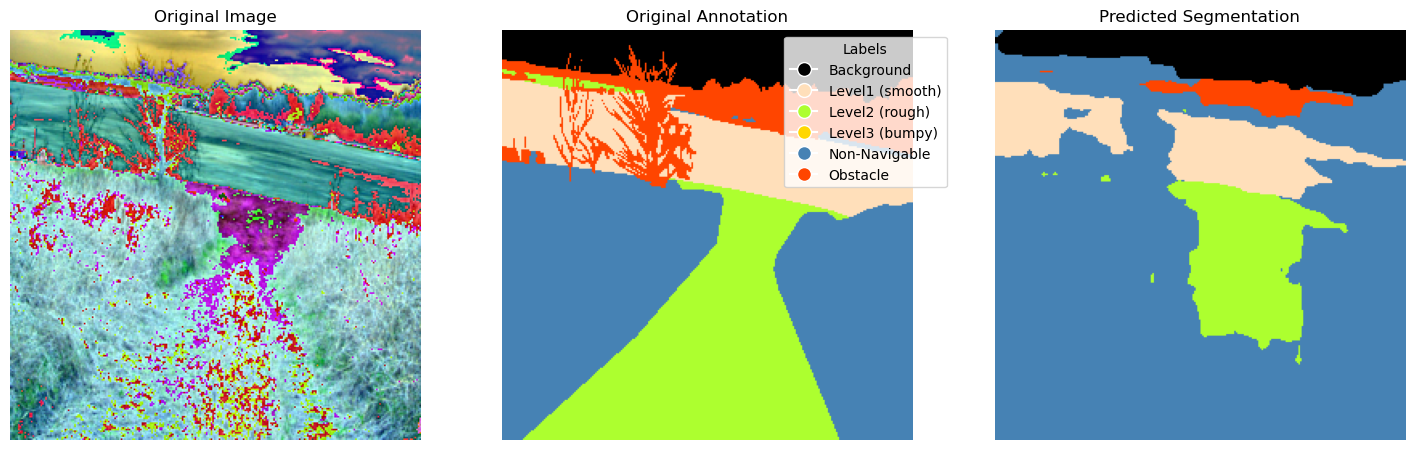

In [10]:


# Transform definitions
transform = transforms.Compose([
 transforms.Resize((256,256)), 
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])
target_transform = transforms.Compose([
    transforms.Resize((256,256), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToTensor()
]) 


dataset = rellis_dataset(data_root_dir='./data/rellis', txt_file='./data/rellis/test.txt', transform=transform, target_transform=target_transform)

label_colors = {
    0: [0, 0, 0],         # Background: black
    1: [255, 223, 186],   # Level1 (smooth) - Navigable: light peach
    2: [173, 255, 47],    # Level2 (rough) - Navigable: light green
    3: [255, 215, 0],     # Level3 (bumpy) - Navigable: gold
    4: [70, 130, 180],     # Non-Navigable (forbidden): steel blue
    5: [255, 69, 0],      # Obstacle: crimson
}
label_names = {
    0: "Background",
    1: "Level1 (smooth)",
    2: "Level2 (rough)",
    3: "Level3 (bumpy)",
    4: "Non-Navigable",
    5: "Obstacle",
}

# Function to decode segmentation map to color
def decode_segmap(annotation):
    annotation_np = annotation.squeeze(0).numpy() 
    color_annotation = np.zeros((annotation_np.shape[0], annotation_np.shape[1], 3), dtype=np.uint8)

    for label, color in label_colors.items():
        color_annotation[annotation_np == label] = color

    return color_annotation

# Select an image from the dataset 1100
image, _ = dataset[1001]  
image_tensor = image.unsqueeze(0).to(device)

# Get model predictions
with torch.no_grad():
    output = model(image_tensor)
    # Assuming output is of shape (batch_size, num_classes, height, width)
    predicted_mask = torch.argmax(output, dim=1)  # Get the predicted class for each pixel

# Decode predicted mask
color_predicted_mask = decode_segmap(predicted_mask.cpu())
# calcuate iou
ious = calculate_iou(predicted_mask.cpu(), _, 6)
miou = np.nanmean(ious)


print(f"IoU per class: {ious}")
print(f"Mean IoU: {miou}")
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# Original Image
ax[0].imshow(ToPILImage()(image))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Colored Annotation
ax[1].imshow(decode_segmap(_))  # Using the original annotations
ax[1].set_title('Original Annotation')
ax[1].axis('off')

# Predicted Segmentation
ax[2].imshow(color_predicted_mask)
ax[2].set_title('Predicted Segmentation')
ax[2].axis('off')

# Legend for colors
handles = []
for label, color in label_colors.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label_names[label],
                                markerfacecolor=np.array(color) / 255, markersize=10))

ax[1].legend(handles=handles, title="Labels", loc='upper right', bbox_to_anchor=(1.1, 1.0))

plt.show()
